In [36]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import pandas as pd

In [9]:
trj=md.load('step_nowater2.xtc',top='step5_1.gro')

In [15]:
oxygen=trj.top.select('name O')
oxygenrmsd=md.rmsd(trj,trj,atom_indices=oxygen)
sodium=trj.top.select('name SOD')
sodiumrmsd=md.rmsd(trj,trj,atom_indices=sodium)
chloride=trj.top.select('name CLA')
chloridermsd=md.rmsd(trj,trj,atom_indices=chloride)
print(

Text(0.5, 1.0, 'root mean squared displacement')

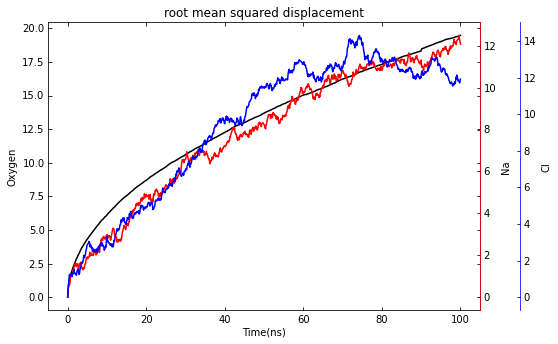

In [29]:
#this is rmsd
time=np.zeros((1001,1))
for i in range (1001):
    time[i]=i*0.1
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.set_ylabel('Oxygen')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Na')
ax3.set_ylabel("Cl")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(40,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,oxygenrmsd,color='black')
curve2,=ax2.plot(time,sodiumrmsd,color='red')
curve3,=ax3.plot(time,chloridermsd,color='blue')
ax1.axis['left'].line.set_color('black')
ax2.axis['right2'].line.set_color('red')
ax3.axis['right3'].line.set_color('blue')
plt.title('root mean squared displacement')

Text(0.5, 1.0, 'mean squared displacement((use the square of msd))')

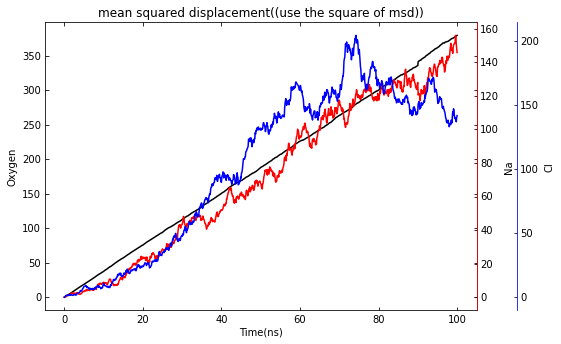

In [44]:
#this is msd

oxygen=trj.top.select('name O')
oxygenmsd=md.rmsd(trj,trj,atom_indices=oxygen)**2
sodium=trj.top.select('name SOD')
sodiummsd=md.rmsd(trj,trj,atom_indices=sodium)**2
chloride=trj.top.select('name CLA')
chloridemsd=md.rmsd(trj,trj,atom_indices=chloride)**2
#
time=np.zeros((1001,1))
for i in range (1001):
    time[i]=i*0.1
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.set_ylabel('Oxygen')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Na')
ax3.set_ylabel("Cl")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(40,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,oxygenmsd,color='black')
curve2,=ax2.plot(time,sodiummsd,color='red')
curve3,=ax3.plot(time,chloridemsd,color='blue')
ax1.axis['left'].line.set_color('black')
ax2.axis['right2'].line.set_color('red')
ax3.axis['right3'].line.set_color('blue')
plt.title('mean squared displacement((use the square of msd))')

Text(0.5, 1.0, 'root mean squared displacement(use the gromacs msd)')

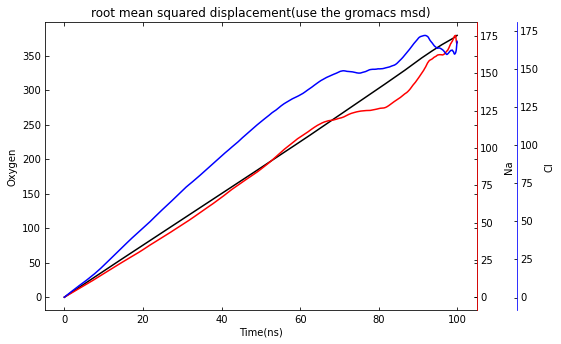

In [45]:
data1=pd.read_csv('msd_Cl.xvg',header=0,names=['Time','Cl-'],skiprows=20,sep='\s+')
data2=pd.read_csv('msd_Na.xvg',header=0,names=['Time','Na'],skiprows=20,sep='\s+')
data3=pd.read_csv('msd_O.xvg',header=0,names=['Time','O'],skiprows=20,sep='\s+')
time=np.zeros((1000,1))
for i in range (1000):
    time[i]=i*0.1
fig=plt.figure(1)
ax1=HostAxes(fig,[0,0,1,1])
ax2=ParasiteAxes(ax1,sharex=ax1)
ax3=ParasiteAxes(ax1,sharex=ax1)
ax1.parasites.append(ax2)
ax1.parasites.append(ax3)
ax1.set_ylabel('Oxygen')
ax1.set_xlabel("Time(ns)")
ax2.set_ylabel('Na')
ax3.set_ylabel("Cl")
ax2_axisline = ax2.get_grid_helper().new_fixed_axis
ax3_axisline = ax3.get_grid_helper().new_fixed_axis
ax2.axis['right2'] = ax2_axisline(loc='right', axes=ax2)
ax3.axis['right3'] = ax3_axisline(loc='right', axes=ax3,offset=(40,0))
fig.add_axes(ax1)
curve1,=ax1.plot(time,data3['O'],color='black')
curve2,=ax2.plot(time,data2['Na'],color='red')
curve3,=ax3.plot(time,data1['Cl-'],color='blue')
ax1.axis['left'].line.set_color('black')
ax2.axis['right2'].line.set_color('red')
ax3.axis['right3'].line.set_color('blue')
plt.title('root mean squared displacement(use the gromacs msd)')